# MARKETING Y COMUNICACIÓN

## ANÁLISIS DE NEGOCIO

### SPRINT N°2
* Fecha de inicio: 02/12/2024
* Fecha de presentación: 9/12/2024

**OBJETIVOS**
1) ¿Cuál es el impacto del tipo de contacto, ya sea móvil o telefónico, a la tasa de conversión de nuestras campañas de marketing?
2) ¿Cómo podemos ajustar nuestras estrategias de comunicación en función de estos resultados?

#### LIBRERIAS

In [13]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### DATAFRAME: df_BANK_marketing

In [14]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing_Sprint2.parquet')
df_BANK_marketing.info()
#16.173 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16173 non-null  int64  
 1   age            16173 non-null  float64
 2   job            16173 non-null  object 
 3   marital        16173 non-null  object 
 4   education      16173 non-null  object 
 5   is_in_default  16173 non-null  int64  
 6   balance        16173 non-null  int64  
 7   housing        16153 non-null  float64
 8   loan           16173 non-null  int64  
 9   contact        16173 non-null  object 
 10  day            16173 non-null  int64  
 11  month          16173 non-null  object 
 12  duration       16173 non-null  int64  
 13  campaign       16173 non-null  int64  
 14  pdays          16173 non-null  int64  
 15  previous       16173 non-null  int64  
 16  poutcome       16173 non-null  object 
 17  deposit        16173 non-null  int64  
dtypes: flo

#### TASA DE CONVERSIÓN SEGÚN 'contact'

Para comenzar con el análisis, averiguaré el valor de la tasa de conversión según el tipo de contacto:
* 'cellular'
* 'telephone'

##### FILTRO 'unknown' DE 'contact'

In [15]:
df_BANK_marketing = df_BANK_marketing[df_BANK_marketing['contact'] != 'unknown']
df_BANK_marketing.info()
#12.785 registros -> 3.388 registros en el camino. Representan un 20.94% de la población
#⚠️ Retocar estos valores cuando se termine el data cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 12785 entries, 368 to 16172
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12785 non-null  int64  
 1   age            12785 non-null  float64
 2   job            12785 non-null  object 
 3   marital        12785 non-null  object 
 4   education      12785 non-null  object 
 5   is_in_default  12785 non-null  int64  
 6   balance        12785 non-null  int64  
 7   housing        12768 non-null  float64
 8   loan           12785 non-null  int64  
 9   contact        12785 non-null  object 
 10  day            12785 non-null  int64  
 11  month          12785 non-null  object 
 12  duration       12785 non-null  int64  
 13  campaign       12785 non-null  int64  
 14  pdays          12785 non-null  int64  
 15  previous       12785 non-null  int64  
 16  poutcome       12785 non-null  object 
 17  deposit        12785 non-null  int64  
dtypes: float6

#### TASA DE ÉXITO SEGÚN EL TIPO DE CONTACTO

In [16]:
#'deposit' == 1 (Contrató depósito) - success
success_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 1]

#'deposit' == 0 (No contrató depósito) - unsuccess
unsuccess_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 0]

#Count total de clientes contactados
total_count = df_BANK_marketing.groupby('contact')['deposit'].count()

#Count de success 
success_count = success_contacts.groupby('contact')['deposit'].count()

#Count de unsuccess 
unsuccess_count = unsuccess_contacts.groupby('contact')['deposit'].count()

#df con el total de contactos, success y unsuccess
contact_analysis = pd.DataFrame({
    'Total contactados': total_count,
    'Contactos exitosos': success_count,
    'Contactos no exitosos': unsuccess_count
})

#Tasa de éxito: success / total de contactos
contact_analysis['Tasa de éxito (%)'] = round((contact_analysis['Contactos exitosos'] / contact_analysis['Total contactados']) * 100,2)

#Tasa de no éxito: unsuccess / total de contactos
contact_analysis['Tasa de no éxito (%)'] = round((contact_analysis['Contactos no exitosos'] / contact_analysis['Total contactados']) * 100,2)

contact_analysis


,Total contactados,Contactos exitosos,Contactos no exitosos,Tasa de éxito (%),Tasa de no éxito (%)
contact,,,,,
cellular,11677,6345,5332,54.34,45.66
telephone,1108,550,558,49.64,50.36


* En la siguiente tabla resumen se observa como la tasa de conversión cuando el cliente fue contactado por **movil** fue del **54.34%**.
* Mientras que la tasa de conversión al ser contactado por **teléfono** deciende al **49.64%**.

->Esto muestra que contactar a través de celulares es más efectivo, con una diferencia de **4.7** puntos porcentuales en la tasa de éxito

->Esto sugiere que priorizar contactos móviles podría mejorar las tasas de conversión generales.

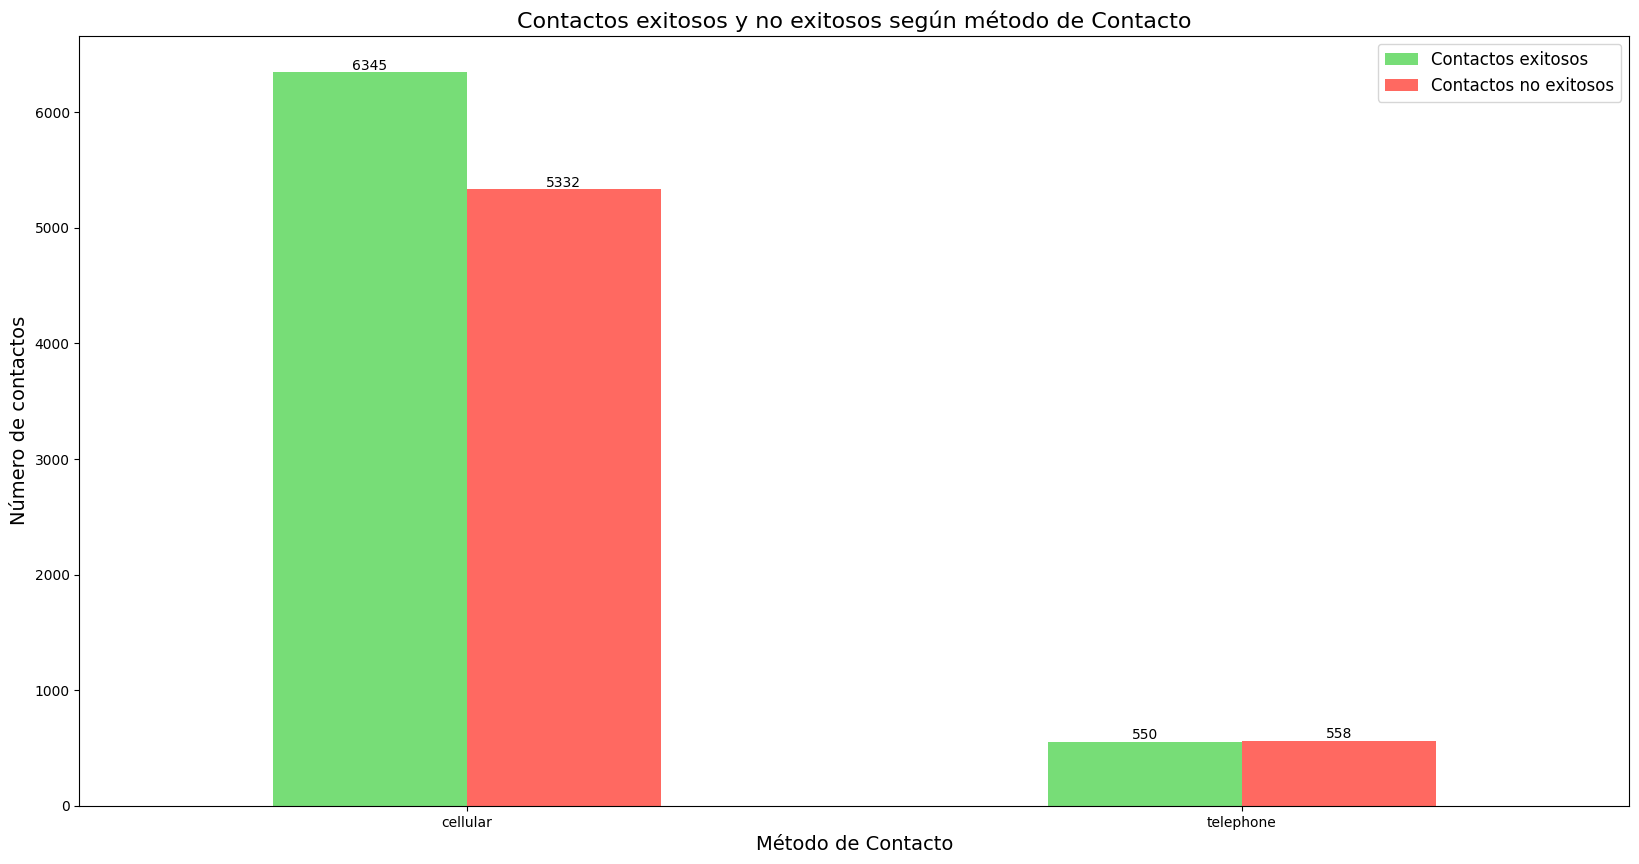

In [17]:
ax = contact_analysis[['Contactos exitosos', 'Contactos no exitosos']].plot(
    kind='bar', 
    stacked=False, 
    figsize=(20, 10),
    color=['#77dd77', '#ff6961']  #Colores verde (Contactos Exitosos) y rojo (Contactos No exitosos)
)

plt.title('Contactos exitosos y no exitosos según método de Contacto', fontsize=16)
plt.xlabel('Método de Contacto', fontsize=14)
plt.ylabel('Número de contactos', fontsize=14)
plt.xticks(rotation=0)
plt.legend(fontsize=12)

#Valores sobre barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  #Centrado en la barra
            height,  #Encima de la barra
            f'{int(height)}',  #Valor a mostrar
            ha='center', 
            va='bottom', 
            fontsize=10
        )

plt.show()

## CONCLUSIÓN

1) ¿Cuál es el impacto del tipo de contacto, ya sea móvil o telefónico, a la tasa de conversión de nuestras campañas de marketing?
2) ¿Cómo podemos ajustar nuestras estrategias de comunicación en función de estos resultados?